#ML - ReglasAsoc_Movies

<p><strong>Objetivo: </strong> El objetivo de este cuaderno es aplicar la técnica de reglas de asociación a un conjunto de datos e interpretar los resultados: </p>

##Instalación de la librería MLXTEND

Para el trabajo con Reglas de Asociación será necesario instalar la librería <b>mlxtend</b> de Python, donde se encuentran implementandos los algoritmos y funciones necesarias para la generación de reglas.
<p>Databricks no trae esa librería por defecto por lo que es necesario instalarla con el comando <b>PIP</b>. El comando PIP permite instalar librerías que no vengan por defecto en el ambiente de desarrollo:</p>

Para google Colab #pip install mlxtend --upgrade

In [0]:
%sh
pip install mlxtend

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


##Cargar y preparar los datos

Para este ejercicio se estará utilizando un conjunto de datos con información de películas. Se van a leer dos archivos CSV. El archivo <b>u.item</b> que contiene los nombres y datos de las películas. El archico <b>u.data</b> contiene los usuarios que han visto cada una de las películas:

<ul>
  <li>Descripción de los datos: <a href="https://grouplens.org/datasets/movielens/" target="_blank">https://grouplens.org/datasets/movielens/</a></li>
  <li>fuente de datos: <a href="http://files.grouplens.org/datasets/movielens/ml-100k/u.item" target="_blank">http://files.grouplens.org/datasets/movielens/ml-100k/u.item</a></li>
  <li>fuente de datos: <a href="http://files.grouplens.org/datasets/movielens/ml-100k/u.data" target="_blank">http://files.grouplens.org/datasets/movielens/ml-100k/u.data</a></li>
  <li>tipo de datos: csv</li>
</ul>

In [0]:
# Importar libreria requerida
import pandas as pd

# Leer datos desde archivos CSV u.item(películas)
columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
csv_path = "http://files.grouplens.org/datasets/movielens/ml-100k/u.item"
df_movies = pd.read_csv(csv_path,sep='|', names=columns, encoding='latin-1')

# Leer datos desde archivo CSV u.data(usuarios)
columns = ['user_id', 'item_id', 'rating', 'timestamp']
csv_path = "http://files.grouplens.org/datasets/movielens/ml-100k/u.data"
df_users = pd.read_csv(csv_path,sep='\t', names=columns)

#Unir los dos dataframes
df_movies_names = df_movies[['item_id', 'movie title']]
df_combine = pd.merge(df_users, df_movies_names, on='item_id')
df_combine = df_combine[['user_id','movie title']]

df_combine.head()

,user_id,movie title
0,196,Kolya (1996)
1,63,Kolya (1996)
2,226,Kolya (1996)
3,154,Kolya (1996)
4,306,Kolya (1996)


In [0]:
df_users.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Es necesario preparar los datos para que estén en la forma adecuada para entrar al algoritmo, donde los usuarios serían las filas y las películas serían las columnas. Una fila tendría <b>Verdadero</b> si el usuario vió la película:

In [0]:
df_final = df_combine.pivot_table(index='user_id', columns='movie title', aggfunc=len, fill_value=0)
df_final = df_final>0
df_final.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

##Explorar los datos

Se puede visualizar la cantidad de usuarios que han visto la películas:

In [0]:
df_combine['movie title'].value_counts()

Out[5]: Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
                            ... 
Big One, The (1997)            1
Girls Town (1996)              1
Favor, The (1994)              1
New Age, The (1994)            1
Modern Affair, A (1995)        1
Name: movie title, Length: 1664, dtype: int64

Se pueden visualizar las 20 películas más vistas en un gráfico de barras, ordenado por frecuencia:

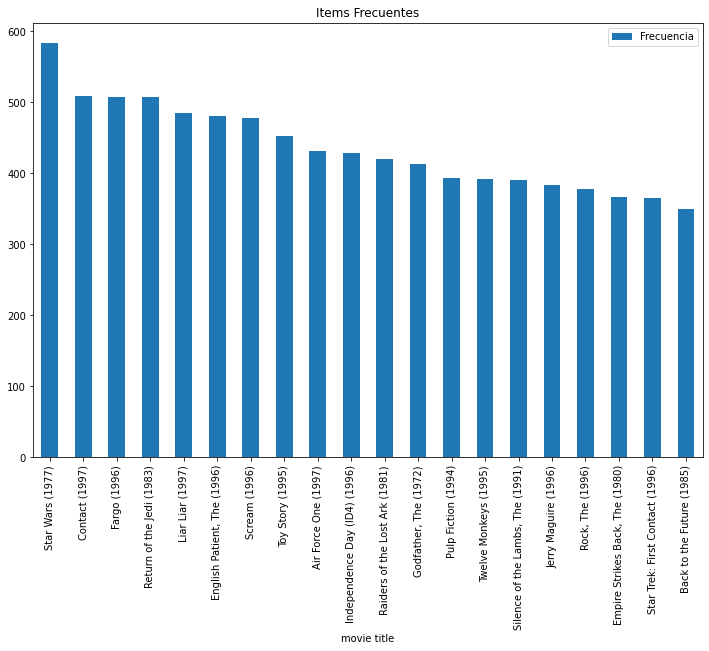

In [0]:
import matplotlib.pyplot as plt
df_final.sum().to_frame('Frecuencia').sort_values('Frecuencia',ascending=False).head(20).plot(kind='bar',figsize=(12,8),title="Items Frecuentes")
plt.show()

##Aplicando el algoritmo y generando reglas

Se van a generar las reglas de asociación de 2 elementos usando el algoritmo <b>FP-Growth</b>. Se utiliza un soporte mínimo de 0.2 y una confianza mínima de 0.5 a manera de ejemplo. Los resultados muestran todas las reglas de asociación, del lado izquierdo (antecedentes) y del lado derecho (consecuente):

In [0]:
from mlxtend.frequent_patterns import association_rules, fpgrowth
# obtener los itemsets frecuentes utilizando el algoritmo fpgrowth
frequent_itemsets = fpgrowth(df_final, min_support = 0.2, max_len = 2, use_colnames=True)
# obtener las reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Contact (1997)),(Star Wars (1977)),0.539767,0.618240,0.354189,0.656189,1.061382,0.020484,1.110377
1,(Star Wars (1977)),(Contact (1997)),0.618240,0.539767,0.354189,0.572899,1.061382,0.020484,1.077574
2,(Star Wars (1977)),(Fargo (1996)),0.618240,0.538706,0.417815,0.675815,1.254514,0.084766,1.422933
3,(Fargo (1996)),(Star Wars (1977)),0.538706,0.618240,0.417815,0.775591,1.254514,0.084766,1.701178
4,(Contact (1997)),(Fargo (1996)),0.539767,0.538706,0.288441,0.534381,0.991971,-0.002335,0.990711
5,(Fargo (1996)),(Contact (1997)),0.538706,0.539767,0.288441,0.535433,0.991971,-0.002335,0.990672
6,(Star Wars (1977)),(Return of the Jedi (1983)),0.618240,0.537646,0.509014,0.823328,1.531357,0.176620,2.617014
7,(Return of the Jedi (1983)),(Star Wars (1977)),0.537646,0.618240,0.509014,0.946746,1.531357,0.176620,7.168611
8,(Return of the Jedi (1983)),(Fargo (1996)),0.537646,0.538706,0.366914,0.682446,1.266824,0.077281,1.452646
9,(Fargo (1996)),(Return of the Jedi (1983)),0.538706,0.537646,0.366914,0.681102,1.266824,0.077281,1.449851


##Analizando los resultados

Para contar cuantas reglas arrojó el resultado de aplicar el algoritmo de <b>FP-Growth</b> con los parámetros establecidos. Se puede ejecutar la siguiente sentencia:

In [0]:
print("Number of rules", rules.shape[0])

Number of rules 1231


Si quisiera obtener las reglas con una confianza mayor a 0.9 se puede aplicar la siguiente sentencia:

In [0]:
# Filtrar
rules[rules['confidence'] > 0.90]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Return of the Jedi (1983)),(Star Wars (1977)),0.537646,0.618240,0.509014,0.946746,1.531357,0.176620,7.168611
32,(Raiders of the Lost Ark (1981)),(Star Wars (1977)),0.445387,0.618240,0.402969,0.904762,1.463449,0.127613,4.008484
163,"(Empire Strikes Back, The (1980))",(Star Wars (1977)),0.389183,0.618240,0.365854,0.940054,1.520534,0.125245,6.368457
267,(Indiana Jones and the Last Crusade (1989)),(Star Wars (1977)),0.351007,0.618240,0.322375,0.918429,1.485555,0.105369,4.680099
409,"(Terminator, The (1984))",(Star Wars (1977)),0.319194,0.618240,0.294804,0.923588,1.493900,0.097465,4.996081
411,"(Terminator, The (1984))",(Raiders of the Lost Ark (1981)),0.319194,0.445387,0.290562,0.910299,2.043838,0.148397,6.182907
477,(Terminator 2: Judgment Day (1991)),(Star Wars (1977)),0.312831,0.618240,0.287381,0.918644,1.485903,0.093976,4.692471
550,(Alien (1979)),(Star Wars (1977)),0.308590,0.618240,0.283139,0.917526,1.484094,0.092357,4.628844
610,(Aliens (1986)),(Star Wars (1977)),0.301166,0.618240,0.274655,0.911972,1.475111,0.088462,4.336797
760,(Blade Runner (1982)),(Star Wars (1977)),0.291622,0.618240,0.269353,0.923636,1.493978,0.089061,4.999243


In [0]:
# Ordenar
rules[rules['confidence'] > 0.90].sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
994,"(Hunt for Red October, The (1990))",(Star Wars (1977)),0.240721,0.618240,0.231177,0.960352,1.553366,0.082354,9.628844
1178,(True Lies (1994)),(Raiders of the Lost Ark (1981)),0.220573,0.445387,0.209968,0.951923,2.137294,0.111728,11.535949
7,(Return of the Jedi (1983)),(Star Wars (1977)),0.537646,0.618240,0.509014,0.946746,1.531357,0.176620,7.168611
1215,(Eraser (1996)),(Independence Day (ID4) (1996)),0.218452,0.454931,0.206787,0.946602,2.080759,0.107406,10.207654
949,(Star Trek: The Wrath of Khan (1982)),(Star Wars (1977)),0.258749,0.618240,0.243902,0.942623,1.524689,0.083934,6.653537
965,(Die Hard (1988)),(Star Wars (1977)),0.257688,0.618240,0.242842,0.942387,1.524307,0.083529,6.626269
163,"(Empire Strikes Back, The (1980))",(Star Wars (1977)),0.389183,0.618240,0.365854,0.940054,1.520534,0.125245,6.368457
1009,"(Lion King, The (1994))",(Star Wars (1977)),0.233298,0.618240,0.217391,0.931818,1.507212,0.073157,5.599152
1018,(Aladdin (1992)),(Star Wars (1977)),0.232238,0.618240,0.216331,0.931507,1.506708,0.072752,5.573701
1199,(Speed (1994)),(Raiders of the Lost Ark (1981)),0.243902,0.445387,0.226935,0.930435,2.089048,0.118304,7.972561


Obtengamos las mejores 10 asociaciones entre películas dada la métrica de <b>lift</b>, esto significa que ocurren con más frecuencia de lo esperado dado el número de combinaciones de usuarios y películas:

In [0]:
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
616,(Alien (1979)),(Aliens (1986)),0.308590,0.301166,0.244963,0.793814,2.635799,0.152026,3.389343
617,(Aliens (1986)),(Alien (1979)),0.301166,0.308590,0.244963,0.813380,2.635799,0.152026,3.704916
485,(Terminator 2: Judgment Day (1991)),"(Terminator, The (1984))",0.312831,0.319194,0.253446,0.810169,2.538172,0.153593,3.586388
486,"(Terminator, The (1984))",(Terminator 2: Judgment Day (1991)),0.319194,0.312831,0.253446,0.794020,2.538172,0.153593,3.336093
963,(Terminator 2: Judgment Day (1991)),(Star Trek: The Wrath of Khan (1982)),0.312831,0.258749,0.200424,0.640678,2.476063,0.119479,2.062916
964,(Star Trek: The Wrath of Khan (1982)),(Terminator 2: Judgment Day (1991)),0.258749,0.312831,0.200424,0.774590,2.476063,0.119479,3.048530
979,"(Terminator, The (1984))",(Die Hard (1988)),0.319194,0.257688,0.200424,0.627907,2.436693,0.118172,1.994963
978,(Die Hard (1988)),"(Terminator, The (1984))",0.257688,0.319194,0.200424,0.777778,2.436693,0.118172,3.063627
923,(Dead Poets Society (1989)),(E.T. the Extra-Terrestrial (1982)),0.266172,0.318134,0.204666,0.768924,2.416985,0.119988,2.950836
922,(E.T. the Extra-Terrestrial (1982)),(Dead Poets Society (1989)),0.318134,0.266172,0.204666,0.643333,2.416985,0.119988,2.057462


Veamos cómo se puede hacer una recomendación. Revisemos qué película recomendariamos si una persona ha visto <b>Jurassic Park</b>:

In [0]:
rules[rules.antecedents.apply(str).str.contains("Jurassic Park")].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
828,(Jurassic Park (1993)),"(Terminator, The (1984))",0.276776,0.319194,0.209968,0.758621,2.376675,0.121623,2.820482
831,(Jurassic Park (1993)),(Terminator 2: Judgment Day (1991)),0.276776,0.312831,0.204666,0.739464,2.363777,0.118082,2.637515
833,(Jurassic Park (1993)),(E.T. the Extra-Terrestrial (1982)),0.276776,0.318134,0.206787,0.747126,2.348467,0.118735,2.696472
816,(Jurassic Park (1993)),(Indiana Jones and the Last Crusade (1989)),0.276776,0.351007,0.226935,0.819923,2.335915,0.129785,3.603980
824,(Jurassic Park (1993)),(Forrest Gump (1994)),0.276776,0.340403,0.213150,0.770115,2.262363,0.118934,2.869247
813,(Jurassic Park (1993)),"(Empire Strikes Back, The (1980))",0.276776,0.389183,0.242842,0.877395,2.254450,0.135125,4.981972
818,(Jurassic Park (1993)),(Back to the Future (1985)),0.276776,0.371156,0.226935,0.819923,2.209108,0.124208,3.492092
825,(Jurassic Park (1993)),"(Fugitive, The (1993))",0.276776,0.356310,0.212089,0.766284,2.150611,0.113471,2.754151
811,(Jurassic Park (1993)),(Raiders of the Lost Ark (1981)),0.276776,0.445387,0.253446,0.915709,2.055984,0.130174,6.579726
820,(Jurassic Park (1993)),(Pulp Fiction (1994)),0.276776,0.417815,0.222694,0.804598,1.925725,0.107052,2.979415


Este gráfico ilustra la relación entre las diferentes métricas. Se ha demostrado que las reglas óptimas son aquellas que se encuentran en lo que se conoce como el <b>límite de confianza-soporte</b>. Esencialmente, estas son las reglas que se encuentran en el borde derecho del gráfico donde se maximiza el soporte, la confianza o ambos:

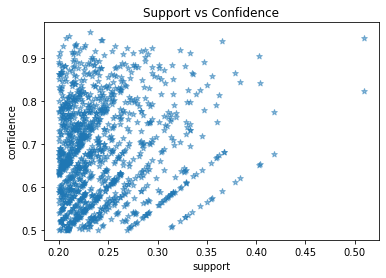

In [0]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5,marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

Se pueden obtener las reglas de interés realizando un filtro sobre los valores de soporte y confianza:

In [0]:
rules_c = rules[rules['confidence'] > 0.90]
rules_s = rules_c[rules_c['support'] > 0.45]
rules_s

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Return of the Jedi (1983)),(Star Wars (1977)),0.537646,0.61824,0.509014,0.946746,1.531357,0.17662,7.168611


In [0]:
rules [(rules['confidence'] > 0.9 ) & (rules['support'] > 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Return of the Jedi (1983)),(Star Wars (1977)),0.537646,0.618240,0.509014,0.946746,1.531357,0.176620,7.168611
32,(Raiders of the Lost Ark (1981)),(Star Wars (1977)),0.445387,0.618240,0.402969,0.904762,1.463449,0.127613,4.008484
163,"(Empire Strikes Back, The (1980))",(Star Wars (1977)),0.389183,0.618240,0.365854,0.940054,1.520534,0.125245,6.368457
267,(Indiana Jones and the Last Crusade (1989)),(Star Wars (1977)),0.351007,0.618240,0.322375,0.918429,1.485555,0.105369,4.680099
1121,(Mission: Impossible (1996)),(Independence Day (ID4) (1996)),0.364793,0.454931,0.332980,0.912791,2.006437,0.167024,6.250124


Este gráfico ilustra la relación entre el soporte y el lift. Podemos ver que las reglas con un lift más elevado suelen tener un soporte relativamente bajo. Las reglas con soporte bajo ocurren pocas veces, pero si tiene un lift alto indica que son muy confiables, estas tienden a ser reglas interesantes:

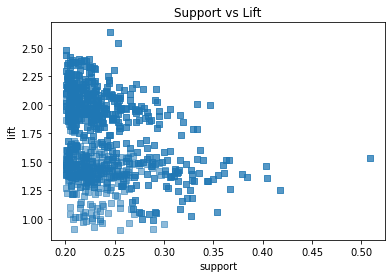

In [0]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5,marker="s")
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

Links de ayuda interesantes:
<ul>
    <li>Reglas de Asociación con mlxtend: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/</li>
    <li>Para aplicar Reglas: http://archive.ics.uci.edu/ml/datasets/Online+Retail</li> 
<ul>